# Introduction

**Exploratory Data Analysis (EDA)** is an approach to analyzing datasets to summarize their main characteristics. It is used to understand the data, get some context regarding it, understand the variables and the relationships between them, and formulate hypotheses that could be useful when building predictive models.

In the Data Analysis with `pandas` lesson, we discussed some basic methods for data exploration; in this lesson, we will learn how to explore our data using visual methods! Specifically, we will introduce the `seaborn` library, which is built on top of `matplotlib` and has support for `NumPy` and `pandas`.

## I. Objectives of EDA

All data analysis must be guided by some key questions or objectives. Before starting any data analysis tasks, you must have a clear goal in mind. When your goal allows you to understand your data and the problem, you will be in a good position to get meaningful results out of your analysis.

Throughout this lesson, we will perform EDA on a dataset that contains information about housing prices and the characteristics of different houses that were sold in a city in the United States.

The following objectives will guide our exploration of this dataset:

- Understand the individual variables in the dataset
- Understand how the variables in this dataset relate to the sale price of the house

Before diving into our data, let’s discuss what a variable is. In general, there are two possible types: **numerical** and **categorical** variables. This is pretty self-explanatory – numerical variables are simply those for which the values are numbers. Categorical variables are those for which the values are categories.

Numerical variables are further broken down into two sub-categories, continuous and discrete. Continuous variables can theoretically take any value (e.g. heights can take any value such as 1.8 metres, 1.801 metres, 1.8000000001 metres, and so on), while discrete variables take very specific values (e.g. headcounts can only take whole numbers since you cannot have a fraction of a person).

Categorical variables are also broken down into two sub-categories, ordinal and nominal. Ordinal variables have a natural order (e.g. `[‘low’, ‘mid’, ‘high’]`), while nominal variables do not (e.g. `[‘apple’, ‘orange’, ‘pear’]`).

![seaborn](seaborn1.png)

In [2]:
import warnings
warnings.filterwarnings('ignore')
%autosave 5

Autosaving every 5 seconds


Now, let’s take a look at the variables in our dataset. We will begin by reading our data as a pandas DataFrame:

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import data
housing = pd.read_csv('house.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

From info, we can see that there are 1,460 observations and 81 columns. Each column represents a variable in the DataFrame. We can see from the data type of each column what type of variable it is. Numerical variables are generally `int64` or `float64` types, categorical variables are generally object types.

An easy way to get a list of columns by data type is to use `select_dtypes()`:

In [4]:
# Get list of numerical variables
print(list(housing.select_dtypes('number').columns))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [5]:
# Get list of categorical variables
print(list(housing.select_dtypes('object').columns))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Let's take a look at some of the numerical variables…:

- `SalePrice`: sales price of the house
- `LotArea`: size of a lot in square feet
- `OverallQual`: rate of the overall material and finish of the house
- `OverallCond`: rate of the overall conditions of the house
- `YearBuilt`: original construction date (this is not technically a numerical variable, but we will be using it to produce another variable called Age)
- `1stFlrSF`: size of the first floor in square feet
- `2ndFlrSF`: size of the second floor in square feet
- `BedroomAbvGr`: number of bedrooms above grade (does not include basement bedrooms)

…and some of the categorical variables:

- `MSZoning`: general zoning classification of the sale
- `LotShape`: general shape of the property
- `Neighborhood`: physical location within city limits
- `CentralAir`: central air conditioning
- `SaleCondition`: condition of sale
- `MoSold`: month sold (MM)
- `Sold` year sold (YYYY)

These variables are the ones we will be working with this lesson. Let’s redefine our housing DataFrame to contain only these variables:

In [6]:
# Redefine DataFrame to include selected variables
numerical = [
    'SalePrice',
    'LotArea',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    '1stFlrSF',
    '2ndFlrSF',
    'BedroomAbvGr'
]

categorical = [
    'MSZoning',
    'LotShape',
    'Neighborhood',
    'CentralAir',
    'SaleCondition',
    'MoSold',
    'YrSold'
]

housing = housing[numerical + categorical]
housing.shape

(1460, 15)

Great, we can see that our DataFrame now only has 15 columns. Let’s move onto some analysis!

## II. Understanding variables with `seaborn`

`Seaborn` is a library that makes attractive and informative statistical graphics in Python. Although `matplotlib` makes it possible to visualize essentially anything you’d want, it is often difficult and tedious to make the plots visually attractive. `Seaborn` can be used to make default matplotlib plots look nicer, and introduces some additional plot types.

We will be using seaborn in this step both on its own to create figures and in conjunction with `matplotlib` to explore the variables in our dataset.

### Target variable
Our **EDA** objective as outlined in the previous step is to “understand how the variables in this dataset relate to the sale price of the house”. Before we can do that, we need to first understand the variable `SalePrice`!

The first thing that we do when we have a numerical variable is show the descriptive statistics. This allows us to get an understanding of the values this variable can take, as well as the distribution and dispersion:

In [7]:
# Get summary statistics for SalePrice
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

From this, we see that the mean sale price is `$180,921`, with a standard deviation of `$79,443`. The cheapest house in the dataset sold for `$34,900`, and the most expensive house sold for `$755,000`.

To get a better understanding of the distribution, we can create a histogram. Let’s first do this with `matplotlib`.

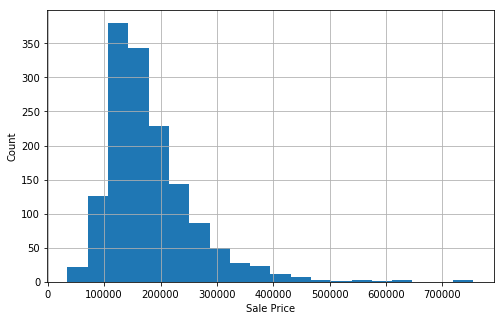

In [8]:
# Plot distribution of SalePrice using matplotlib
plt.figure(figsize=(8,5))
plt.hist(housing['SalePrice'], bins=20)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Now, let's do this with `seaborn` to see the differences. Note that, by convention, we import the `seaborn` library as `sns`.

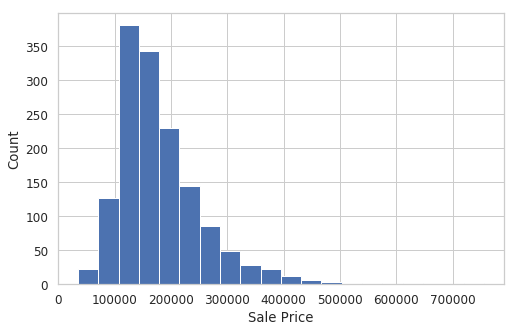

In [9]:
# Plot distribution of SalePrice using seaborn
import seaborn as sns

sns.set(style='whitegrid',               # changes style (white background with grid)
        palette="deep",                  # changes color palette
        font_scale=1.1,                  # increases font size
        rc={"figure.figsize": [8, 5]})   # sets figure size

sns.distplot(
    housing['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count')
plt.show()

With just one method `sns.set()`, we are able to style our figure, change the color, increase font size for readability, and change the figure size! Looks much nicer, doesn’t it…? Note that we use distplot to plot histograms in seaborn. This by default plots a histogram with a kernel density estimation (KDE). Try changing the parameter kde=True to see what this looks like!

Taking a look at the histogram, we can see that very few houses are priced below 100,000, most of the houses sold between 100,000 and 200,000, and very few houses sold for above 400,000.

### Numerical variables

If you want to examine all the numerical variables in the dataset, pandas allows us to apply the matplotlib method hist() to an entire DataFrame object, not just a series. Let’s set the figure size to (15, 6) and layout to (2, 4):

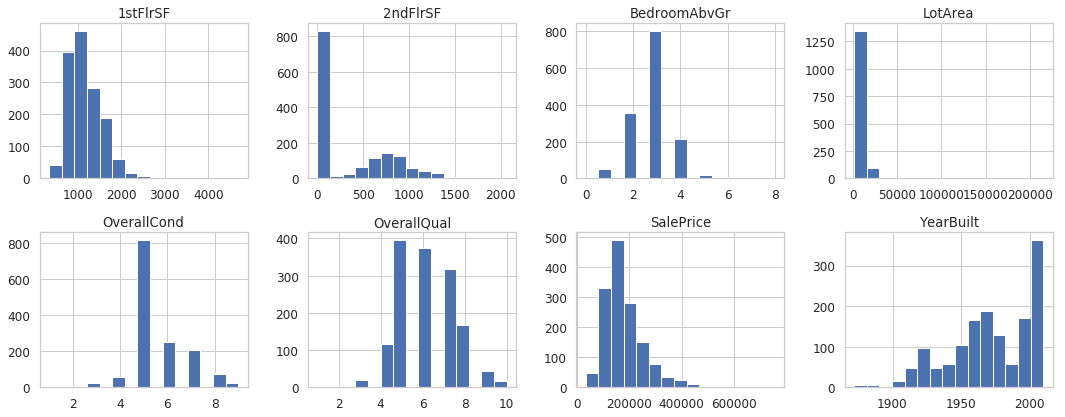

In [10]:
# Plot numerical variables using pandas + matplotlib
housing[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.tight_layout()
plt.show()

In a single line of code, we can see that pandas produces a very nice visualization of the 8 numerical variables. Note that the figure keeps the style that we set previously using seaborn even though now we are using pandas and matplotlib!

From the plots we get a lot of information:

- Most of the houses have first floors with areas of 1,000 to 1,200 square feet. Very few houses have a second floor.
- Most houses have three bedrooms.
- The lot area is highly skewed; there are few houses with a large amount of area.
- The ratings for conditions and quality tend to be around 5; few houses have very high or low ratings.
- The YearBuilt variable is actually not useful in its present form. However, we can use it to construct a variable that actually makes sense.

Let’s define a new variable, `Age`, as the year in which the house was sold minus the year in which the house was built. Then, we will remove the YearBuiltvariable from our numerical variables and replace it with the Age variable, and do the plot again to see how the distribution of age appears:

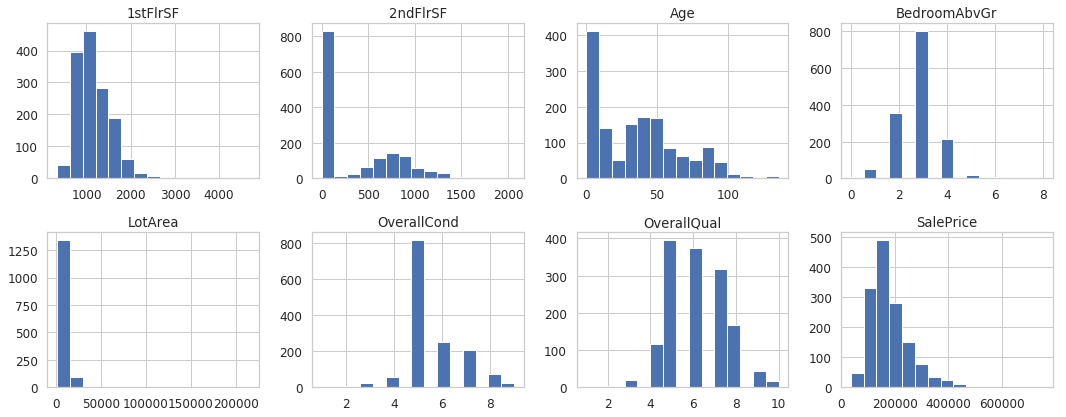

In [11]:
# Create 'Age' variable and replace 'YearBuilt' with it
housing['Age'] = housing['YrSold'] - housing['YearBuilt']
numerical.remove('YearBuilt')
numerical.append('Age')

# Replot numerical variables
housing[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.tight_layout()
plt.show()

We see the `Age` variable with a big bar here at 0 i.e. around 400 houses were sold when they were new.

### Categorical variables

Bar plots are often used to understand the distribution of categorical variables. To create a `matplotlib` bar plot for a categorical variable with a `pandas` series object, for example `SaleCondition`, we first need to calculate the `value_counts`, and then use the plot method and specify `kind=bar`:

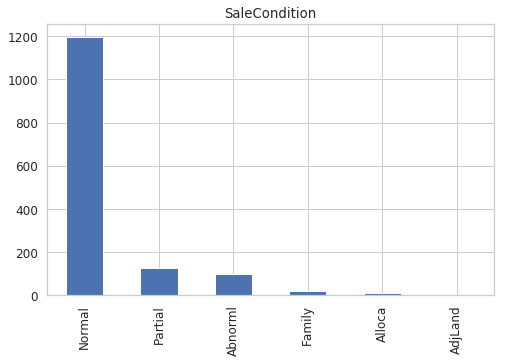

In [12]:
# Plot distribution of SaleCondition using matplotlib
housing['SaleCondition'].value_counts().plot(kind='bar', title='SaleCondition')
plt.show()

…or, we can simply use the `countplot` method in `seaborn`:

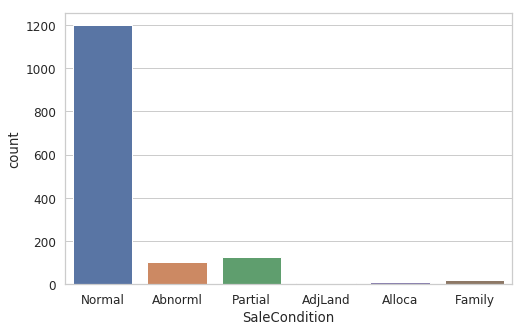

In [13]:
# Plot distribution of SaleCondition using seaborn
sns.countplot(housing['SaleCondition'])
plt.show()

We see that most of the houses were sold under `Normal` condition.

In order to visualize all the categorical variables in our dataset, just as we did with the numerical variables, we don't have a method to do it directly with `pandas`. But, we learned in the “Data Visualization with `matplotlib`” lesson how to loop through pandas series to create subplots!

Using `plt.subplots`, we will create a figure with a grid of 2 rows and 4 columns. Then we will iterate over every categorical variable to create a countplot with seaborn:

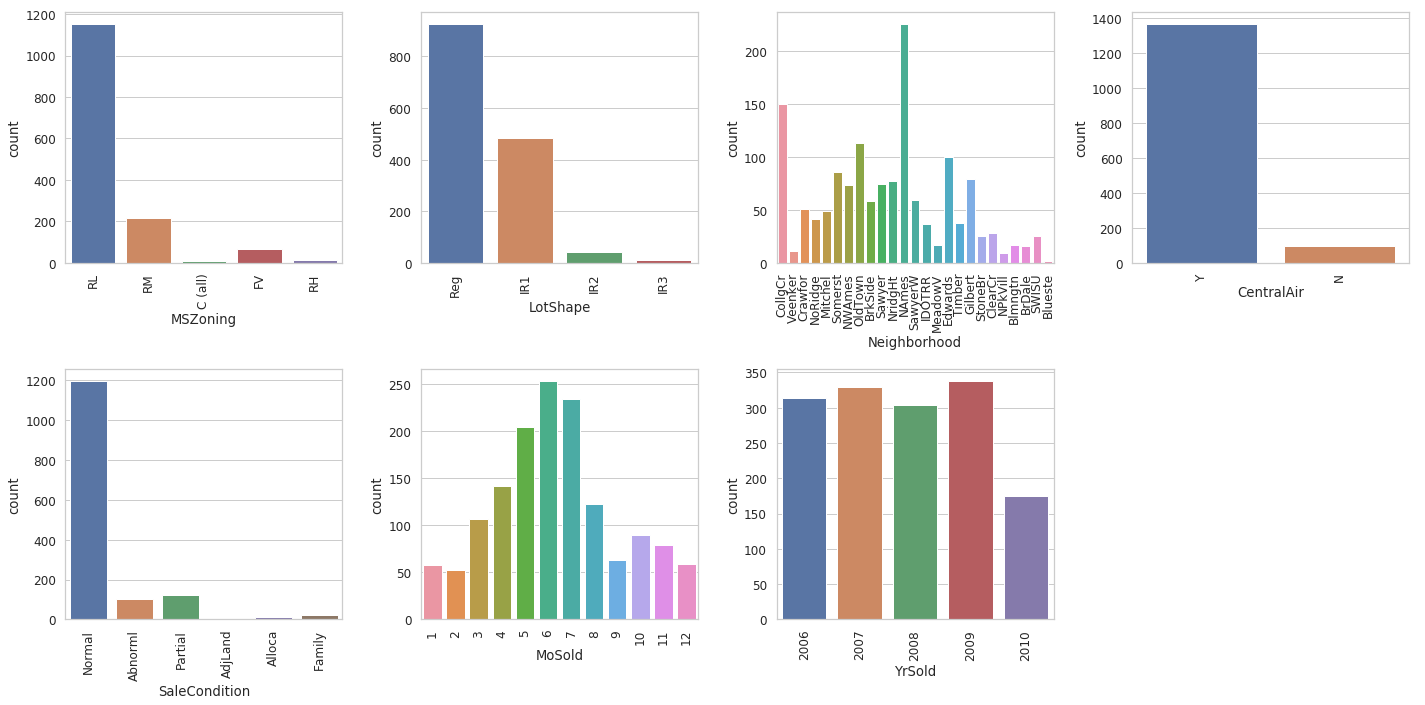

In [14]:
# Plot categorical variables using matplotlib + seaborn
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Since there are only 7 variables and 8 plots, we will remove this plot's axis
# You can remove this line to see how the figure would look otherwise
ax[-1,-1].axis('off')

fig.tight_layout()
plt.show()

The second for loop simply gets each x-tick label and rotates it 90 degrees to make the text fit on the plots better (you can remove these two lines if you want to know how the text looks without rotation).

There is a lot of noise in these plots. There are many categories that have very few observations e.g. “C (all)” and “RH” categories in MSZoning, “AdjLand”, “Alloca”, and “Family” categories in SaleCondition.

So, to get a better understanding of these variables, we will apply a function that removes any categories with less than 30 values:

In [15]:
# Write function that returns list of categories with more than 30 observations
def above30(series):
    counts = series.value_counts()
    return list(counts[counts >= 30].index)

This function takes a `pandas` series and counts the values for each category. Then, it returns a list of category names for those with over 30 observations. We will now apply this function to each of our categorical variables using apply:

In [16]:
# Apply function to each categorical variable
categories_to_keep = housing[categorical].apply(above30, axis=0)
print(categories_to_keep)

# Loop through categorical variables to keep only categories with more than 30 observations
for variables in categorical:
    housing = housing.loc[housing[variables].isin(categories_to_keep[variables])]

MSZoning                                              [RL, RM, FV]
LotShape                                           [Reg, IR1, IR2]
Neighborhood     [NAmes, CollgCr, OldTown, Edwards, Somerst, Gi...
CentralAir                                                  [Y, N]
SaleCondition                           [Normal, Partial, Abnorml]
MoSold                     [6, 7, 5, 4, 8, 3, 10, 11, 9, 12, 1, 2]
YrSold                              [2009, 2007, 2006, 2008, 2010]
dtype: object


By applying our function, we get categories_to_keep , a list of categories with over 30 observations for each of our categorical variables. Then we indexed our housing DataFrame to keep these categories by using isin. In plain English, this snippet says “For each categorical variable in our dataset, we have a list of names of categories we have found to have over 30 observations (categories_to_keep). Keep the categories that are in this list.”

We can see by printing the new shape, we end up with fewer observations – from 1460 originally to 1246.

In [ ]:
# Print shape of new DataFrame
housing.shape

Now, let's take another look at our countplots:

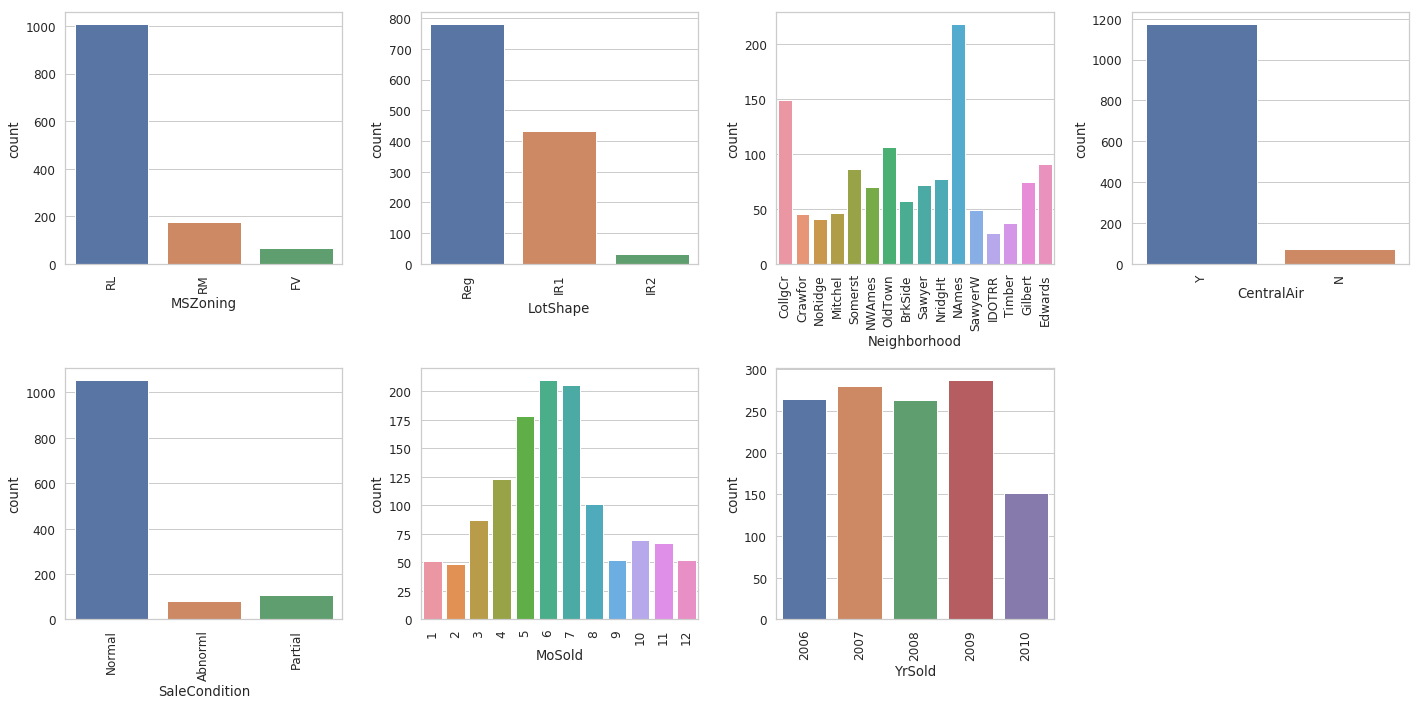

In [17]:
# Plot categorical variables using matplotlib + seaborn
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Since there are only 7 variables and 8 plots, we will remove this plot's axis
# You can remove this line to see how the figure would look otherwise
ax[-1,-1].axis('off')

fig.tight_layout()
plt.show()

Much cleaner! Now, the categories in the variables `MSZoning`, `LotShape`, `SaleCondition`, and `Neighborhood` with few observations have been removed.

Great, we have now learned about the distributions of our numerical variables, and about the counts and different categories of our categorical variables. In the next step, we will take a look at the relationship between these variables – more importantly, how these variables impact our target variable, SalePrice!

## III. Relationships between variables

Plotting relationships between variables allows us to easily get an visual understanding of patterns and correlations. The scatter plot is often used for visualizing relationships between two numerical variables, the box plot is used for visualizing relationships between one numerical variable and one categorical variable, and complex conditional plots will be used to visualize many variables in a single visualization.

### Scatter plot

To produce a `matplotlib` scatter plot between two numerical `pandas` series, you simply use the `scatter()` method and pass an x value and a y value:

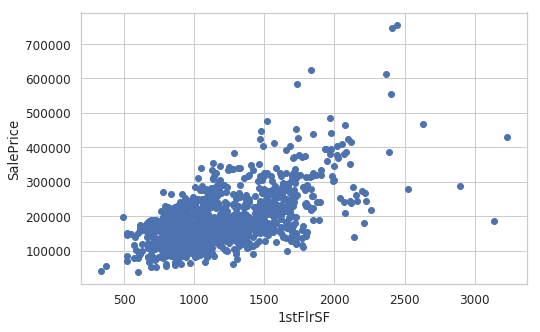

In [18]:
# Plot relationship between 1stFlrSF and SalePrice using matplotlib
plt.scatter(x=housing['1stFlrSF'], y=housing['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()

The seaborn method is almost identical. However you can see that the axis labels are added for us by default, and the markers are outlined to make them clearer:

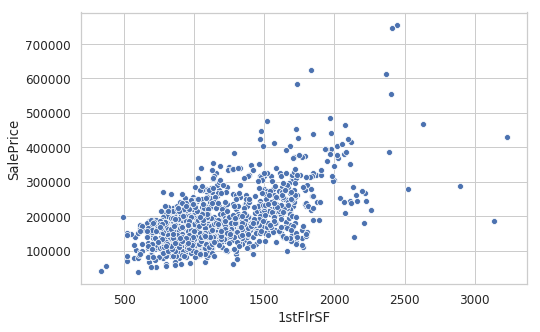

In [19]:
# Plot relationship between 1stFlrSF and SalePrice using seaborn
sns.scatterplot(x=housing['1stFlrSF'], y=housing['SalePrice'])
plt.show()

From the scatter plot, we see here that we have a positive relationship between the `1stFlrSF` of the house and the `SalePrice` of the house. In other words, the larger the first floor of a house, the higher the likely sale price.

`Seaborn` also provides us with a nice function called jointplot which will give you a scatter plot showing the relationship between two variables along with histograms of each variable in the margins – also known as a marginal plot.

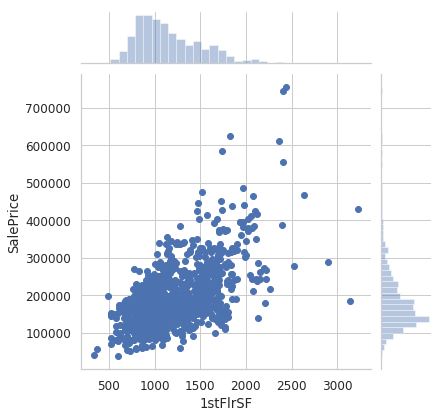

In [20]:
# Plot scatter + marginal plot between 1stFlrSF and SalePrice
sns.jointplot(x=housing['1stFlrSF'], y=housing['SalePrice'])
plt.show()

This is nice because you not only see the relationships between the two variables, but you can also see how they are distributed individually.

If you want to visualize many scatter plots at the same time, you can produce what is called a scatter plot matrix. Seaborn makes this very easy to do with the pairplot function.

It is recommended that you use no more than four or five variables at a time because otherwise it will be very hard to see.

Let’s pass in four of our numerical variables to get a scatter plot matrix:

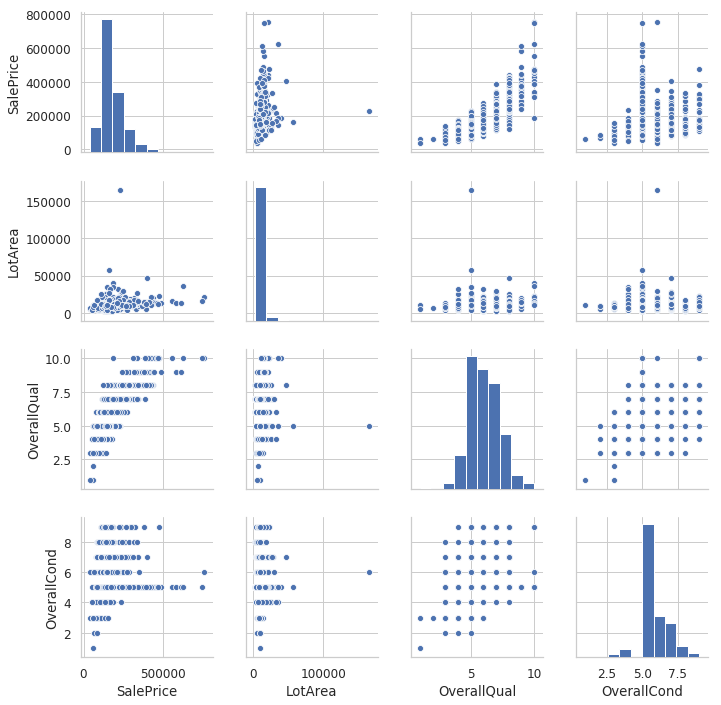

In [21]:
# Plot scatters between SalePrice, LotArea, OverallQual, and OverallCond
sns.pairplot(housing[numerical[:4]])
plt.show()

Note that the plots on the diagonal axes are simply histograms for each individual variable since creating a scatter plot with itself is meaningless.

We see from this scatter plot matrix that we have a very clear positive relationship between the SalePrice of the house and OverallQual. There is also a slightly less clear, but still obviously positive relationship between SalePrice and OverallCond.

Now let’s visualize the relationship between SalePrice and the rest of our numerical variables:

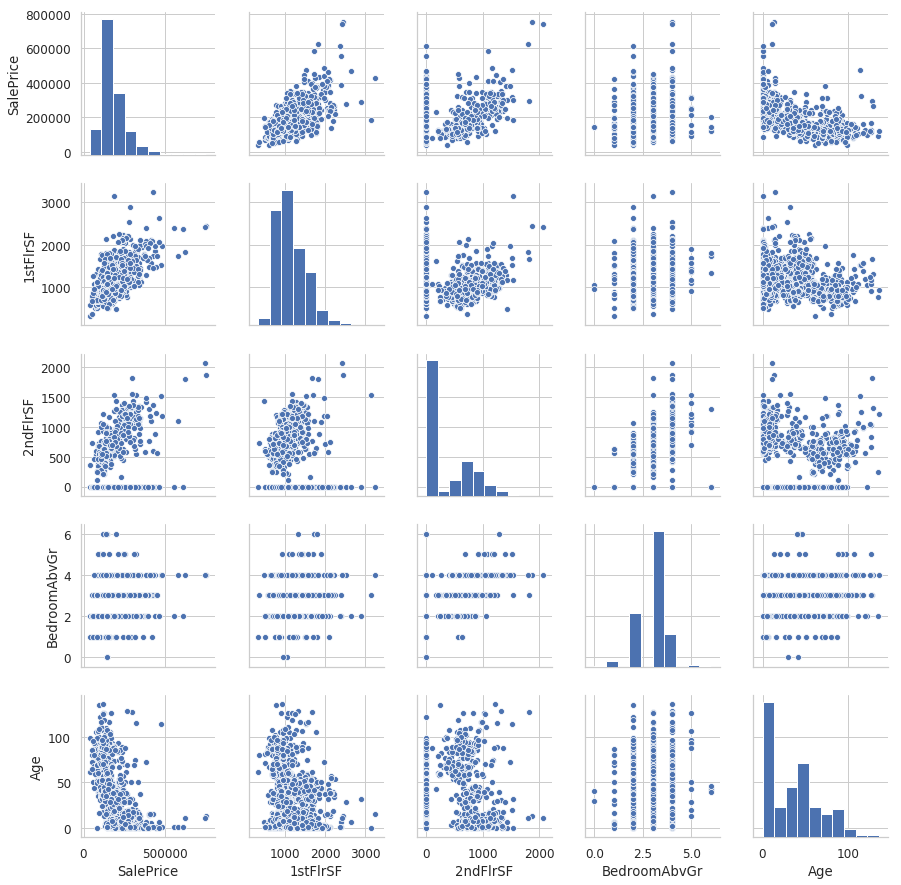

In [22]:
# Plot scatters between SalePrice, 1stFlrSF, 2ndFlrSF, BedroomAbvGr, and Age
sns.pairplot(housing[['SalePrice'] + numerical[4:]])
plt.show()

The output shows that `1stFlrSF` and `2ndFlrSF` of the house is positively correlated with `SalePrice`, while `Age` has a negative non-linear relationship with `SalePrice`.

### Box plot

We can use a box plot to visualize the relationship between the categorical variables in our dataset and the SalePrice of the house. A box plot is a convenient way of graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers), indicating variability outside the upper and lower quartiles – box plots with whiskers are, unsurprisingly, called box-and-whisker plots.

There is no real elegant way to do this with matplotlib’s boxplot method which only allows us to pass an x variable. So we will skip straight to using seaborn, which lets us pass an x and a y variable:

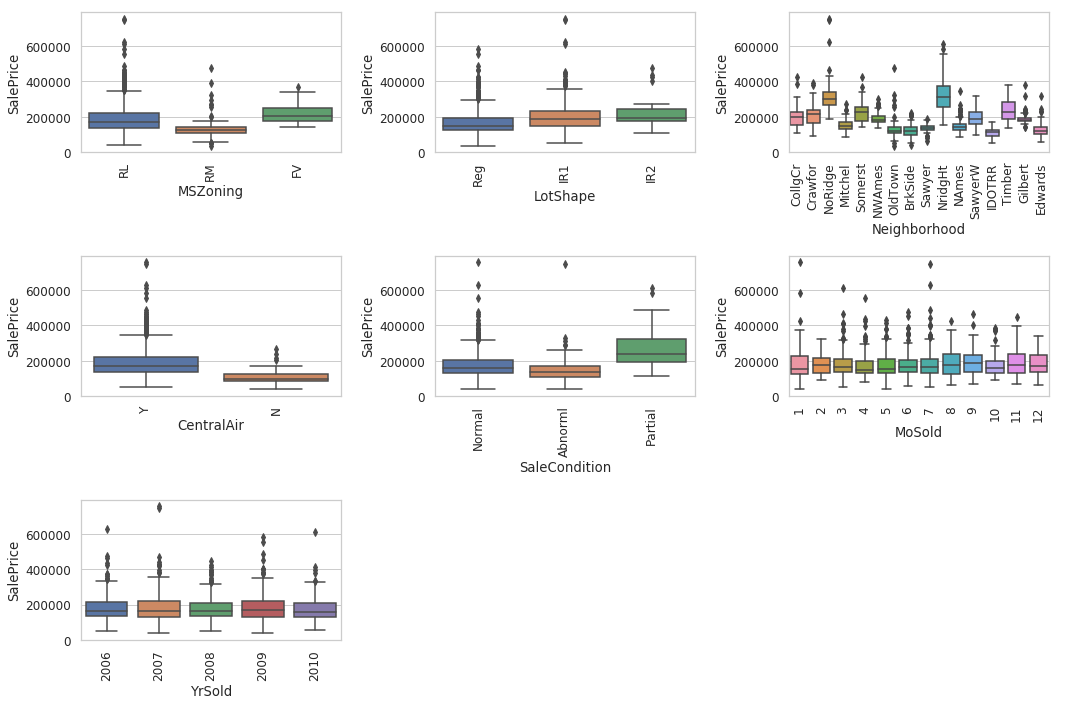

In [23]:
# Plot box plots between SalePrice and categorical variables
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Since there are only 7 variables and 9 plots, we will remove these plots' axis
ax[-1,-1].axis('off')
ax[-1,-2].axis('off')
        
fig.tight_layout()
plt.show()

Here, we have iterated through every subplot to produce the visualization between all categorical variables and the `SalePrice`. Take a look at every single subplot and see if you understand them.

Let’s take a closer look at the `Neighborhood` variable. We see that there is definitely a different distribution for different neighborhoods, but the visualization is a bit difficult to decipher. Let’s sort our box plots by cheapeast neighborhood to most expensive (by median price) using the additional argument order.

In [24]:
# Sort neighborhoods by median SalePrice from lowest to highest
sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
print(sorted_nb)

Neighborhood
IDOTRR     112500
OldTown    119450
Edwards    120000
BrkSide    121600
Sawyer     135000
NAmes      140000
Mitchel    148950
Gilbert    180250
NWAmes     185000
SawyerW    189000
CollgCr    196500
Crawfor    217000
Somerst    225500
Timber     228000
NoRidge    301500
NridgHt    315000
Name: SalePrice, dtype: int64


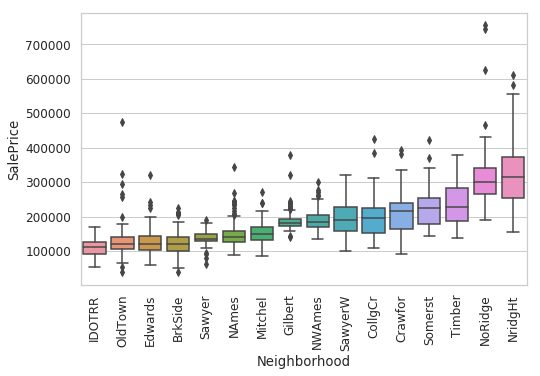

In [25]:
# Create sorted boxplot between Neighborhood and SalePrice
sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index))
plt.xticks(rotation=90)
plt.show()

In the above snippet, we sorted our neighborhoods by median price and stored this in sorted_nb. Then, we passed this list of neighborhood names into the order argument to create a sorted box plot.

This figure gives us a lot of information. We can see that in the cheapest neighborhoods houses sell for a median price of around 100,000, and in the most expensive neighborhoods houses sell for around 300,000. We can also see that for some neighborhoods, dispersion between the prices is very low (small boxes), meaning that all the prices are close to each other. In the most expensive neighborhood “`NridgHt`”, however, we see a large box – there is large dispersion in the distribution of prices.

### Complex conditional plots

`Seaborn` also allows us to create plots that condition on one variable. For example, if we are conditioning on the `Neighborhood`, using the FacetGrid function we can visualize a scatter plot between the `OverallQual` and the `SalePrice` variables:

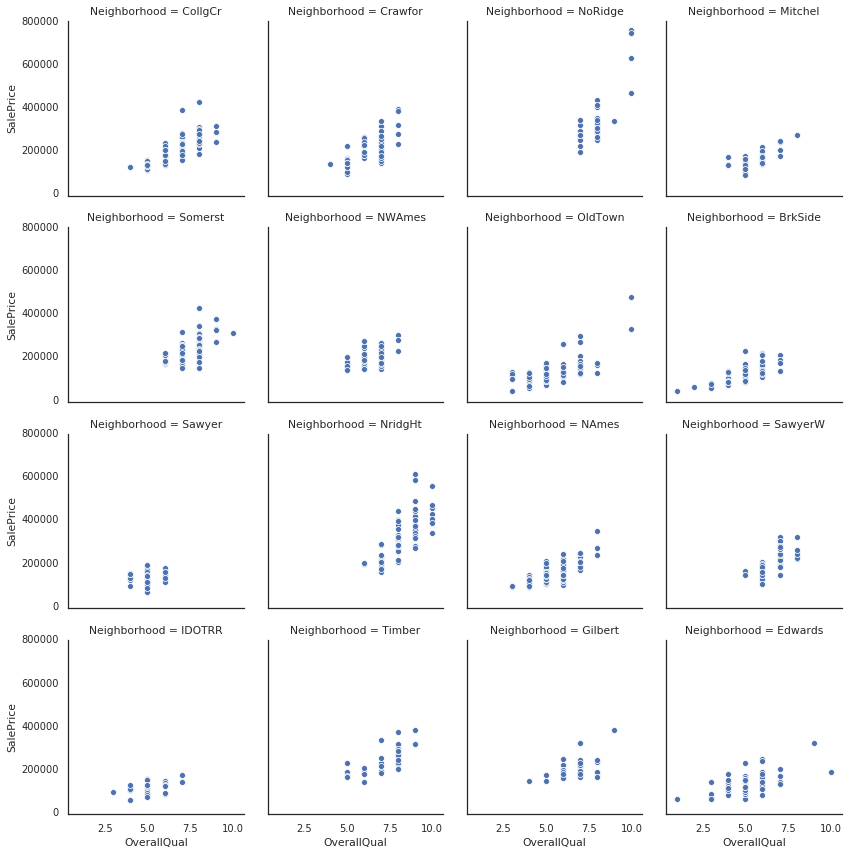

In [26]:
## Reset defaults to make font smaller, figure bigger, and remove grid
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [20, 10]})

# Create scatter plot between OverallQual and SalePrice, conditioning on Neighborhood
cond_plot = sns.FacetGrid(data=housing, col='Neighborhood', col_wrap=4)
cond_plot.map(sns.scatterplot, 'OverallQual', 'SalePrice')
plt.show()

This outputs 16 subplots – one for each neighborhood. For each neighborhood we can see the relationship between `OverallQual` and `SalePrice`.

If you want to visualize more variables, you can produce a conditional plot using the `FacetGrid` method and pass categorical variables as columns and rows, with an additional categorical variable to color the points of your scatter plot with different colors.

This will make more sense with an example.

Let’s visualize the relationship between `Age` and `SalePrice`, differentiating between houses with and without `CentralAir`, but this time conditioning on the year when the house was sold and the `SaleCondition`
variable:

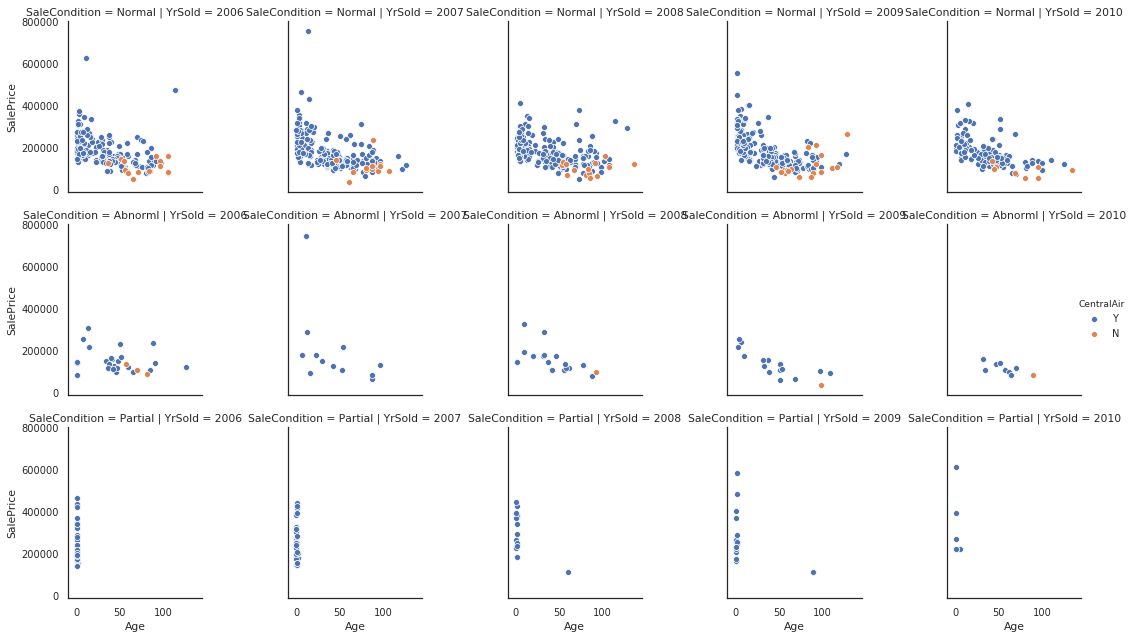

In [28]:
# Create scatter plot between Age and SalePrice, conditioning on YrSold and SaleCondition
cond_plot = sns.FacetGrid(data=housing, col='YrSold', row='SaleCondition', hue='CentralAir')
cond_plot.map(sns.scatterplot, 'Age', 'SalePrice').add_legend()
plt.tight_layout()
plt.show()

There’s a lot to unpack here.

- Each column of the figure corresponds to each year starting from 2006-2010
- The three rows correspond to the “`Normal`”, “`Abnormal`”, and “`Partial`” conditions of sale
- We see a negative relationship between Age and SalePrice for every subgroup in the normal row.
- We have very few observations where the SaleCondition was “Partial”, and for most of these observations the age of the house was 0.
- The orange points correspond to those houses that do not have CentralAir. Most of these are located around 50 to 100 on the x axis so we can say that these are the older houses.

This is just a sample to show how easy it is to produce complex visualizations and how you can get valuable information from them. It is good practice as a data analyst to produce these visualizations to get quick insights about variable relationships.

Create a conditional plot that explores the relationship between `OverallCond` and `SalePrice` that conditions on `LotShape` as columns and `MSZoning` as rows. Markers in the scatterplot should be colored based on `Neighborhood`. Remember to include a legend!

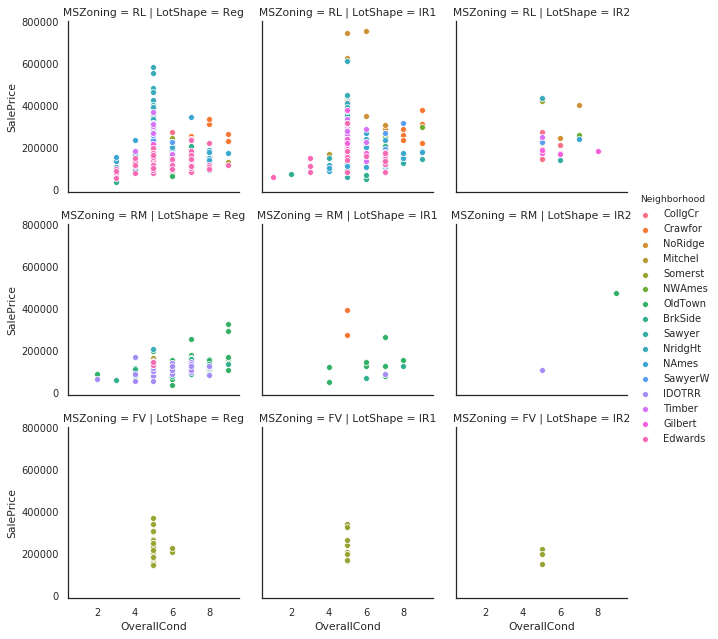

In [29]:
# TASK --- Create a complex conditional plot

cond_plot_1 = sns.FacetGrid(data=housing, col='LotShape', row='MSZoning', hue='Neighborhood')
cond_plot_1.map(sns.scatterplot, 'OverallCond', 'SalePrice').add_legend()
